# Data Visualization

## Quantitiative Daten
Quantitative Daten sind Messwerte die in numerischer Form dargestellt werden.

Zur Visualisierung von quantitativen Daten werden meist Histogramme, Boxplots und Streudiagramme verwendet.

Zur Darstellung in Python kann die `seaborn` Plotting Library verwendet werden. Die nächsten Beispiele werden mit dieser Library und dem Datensatz Titanic (`titanic.csv`) realisiert.

In [87]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))
    
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

In [116]:
# Load the dataset in Python and drop N/A values to make plot function calls simpler
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
# df_interact(ti)

In [89]:
# HIDDEN
# Enable R in Python notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [90]:
%%R
# Init libraries
install.packages("lmtest")
install.packages("vcd", repos="http://R-Forge.R-project.org")
library(vcd)

In [134]:
%%R
# Load the dataset in R and drop N/A values to make plot function calls simpler
ti <- read.csv("titanic.csv", header = TRUE, sep=",")
# Delete rows with empty values
# For some reasons the r dataset contains three additional rows
# Source: https://stackoverflow.com/questions/9126840/delete-rows-with-blank-values-in-one-particular-column
ti <- ti[!(is.na(ti$PassengerId) | is.na(ti$Survived) | is.na(ti$Pclass) | ti$Name=="" |
           ti$Sex=="" | is.na(ti$Age) | is.na(ti$SibSp) | is.na(ti$Parch) | ti$Ticket=="" |
           is.na(ti$Fare) | is.na(ti$Cabin) | ti$Cabin=="" | ti$Embarked==""), ] 
# Generate a "Who" column for sorting man/woman/children
# Source: https://rstudio-pubs-static.s3.amazonaws.com/143316_106d643df86c4e4c8ae20e9775ab0ec7.html
ti$Who[ti$Sex=="male"] <- "man"
ti$Who[ti$Sex=="female"] <- "woman"
ti$Who[ti$Age<18] <- "child"

### Histogramme
Histogramme eignen sich gut um Verläufe von Häufigkeitsverteilungen zu visualisieren. Der Datensatz der Titanic enthält für jeden Passagier eine Zeile mit Informationen, darunter auch das Alter. Somit kann man eine Verteilung des Alters der Passagiere erstellen.

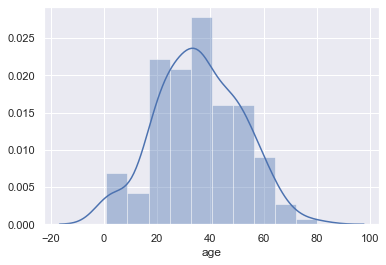

In [92]:
# Adding a semi-colon at the end tells Jupyter not to output the
# usual <matplotlib.axes._subplots.AxesSubplot> line
sns.distplot(ti['age']);

In [93]:
%%R
# Following function is needed to force break intervals in histogramms in R
# Source: https://stackoverflow.com/questions/49438936/understanding-hist-and-break-intervals-in-r
breakInterval <- function(data, interval) {
    seq(min(data), max(data), length.out = interval+1)
}

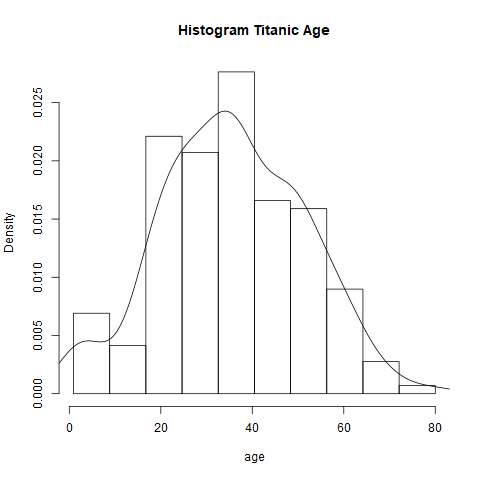

In [94]:
%%R
hist(ti$Age, freq=FALSE, breaks=breakInterval(ti$Age, 10), xlab="age", main="Histogram Titanic Age")
# Draw KDE (gaussian kernel densitiy estimate) over histogram
# Source: https://stackoverflow.com/questions/20952730/how-to-draw-kde-over-histogram-plot
dens <- density(ti$Age)
lines(dens)

Die Python Funktion `distplot` fügt automatisch eine geglättete Kurve, die KDE (Kernel Density Estimation) bzw. in Deutsch die Kerndichteschätzung, welche eine Wahrscheinlichkeitsdichtefunktion darstellt die zur Erstellung der Wahrscheinlichkeitsverteilung dient.

In R wird diese Kurve nicht automatisch erstellt, man kann aber nach dem Plotten des Histogramms mit der Funktion `density` ein KDE erzugen und mithilfe von `lines` dem vorher erzeugten Grafik-Object die Kurve hinzufügen. Das Aufrufen von Funktionen nach dem Plotten zur weiteren Bearbeitung der Ausgabe ist ein oft verwendetes Konzept in R.

Weiters kann ein sogennanter "Rug" erstellt werden, damit sind Markierungen aller individuellen Werte auf der x-Achse gemeint. In Python ist es eine Parameterzugabe, in R wieder ein Funktionsaufruf.

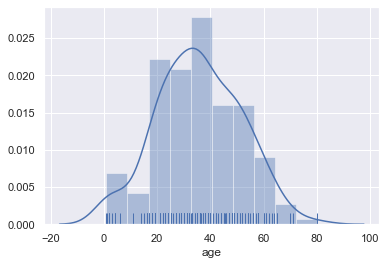

In [95]:
sns.distplot(ti['age'], rug=True);

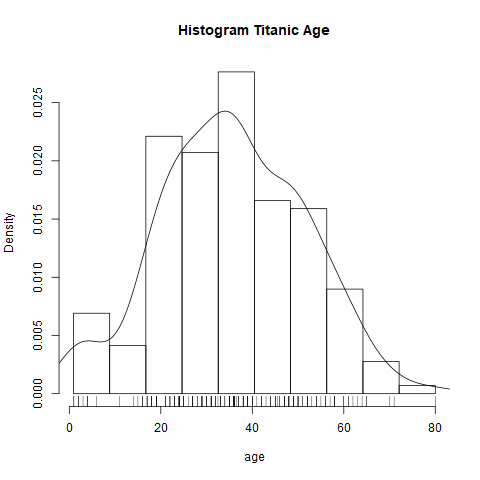

In [96]:
%%R
hist(ti$Age, freq=FALSE, breaks=breakInterval(ti$Age, 10), xlab="age", main="Histogram Titanic Age")
# Draw KDE (gaussian kernel densitiy estimate) over histogram
# Source: https://stackoverflow.com/questions/20952730/how-to-draw-kde-over-histogram-plot
dens <- density(ti$Age)
lines(dens)
rug(ti$Age)

Weiters kann die Anzahl der "Rechtecke" des Histogramms verändert werden. Eine Erhöhung dieser führt zu einer feinerern Erkennung der Altersgruppen.

Für R habe eine Funktion `breakInterval` geschrieben, der den Plot die Anzahl der "Rechtecke" vorschreibt. Nur die gewünschte Anzahl anzugeben führt oft nicht zum gewünschten Ergebniss, da R nicht garantiert, diese einzuhalten.

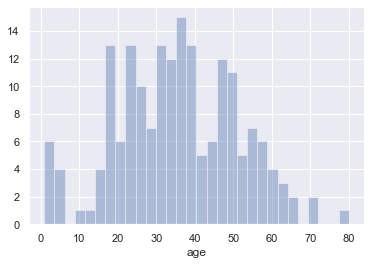

In [97]:
sns.distplot(ti['age'], kde=False, bins=30);

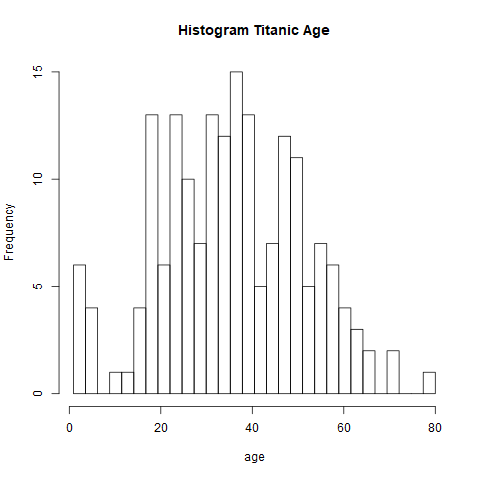

In [125]:
%%R
hist(ti$Age, breaks=breakInterval(ti$Age, 30), xlab="age", main="Histogram Titanic Age")

### Box plots

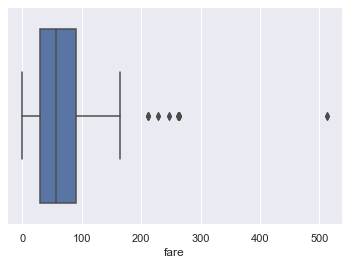

In [129]:
sns.boxplot(x='fare', data=ti);

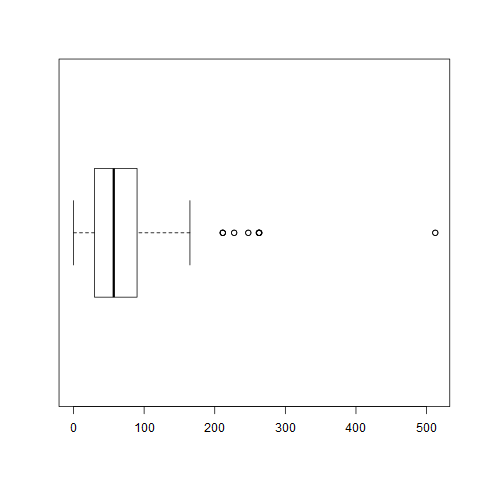

In [137]:
%%R
boxplot(ti$Fare, horizontal=TRUE)

In [112]:
lower, upper = np.percentile(ti['fare'], [25, 75])
iqr = upper - lower
iqr

23.0896

In [113]:
upper_cutoff = upper + 1.5 * iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff, lower_cutoff

(65.6344, -26.724)

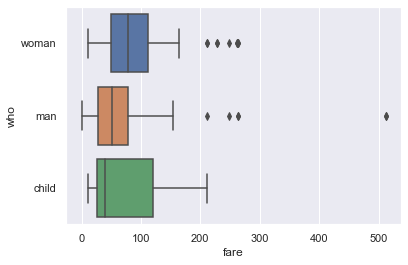

In [123]:
sns.boxplot(x='fare', y='who', data=ti);

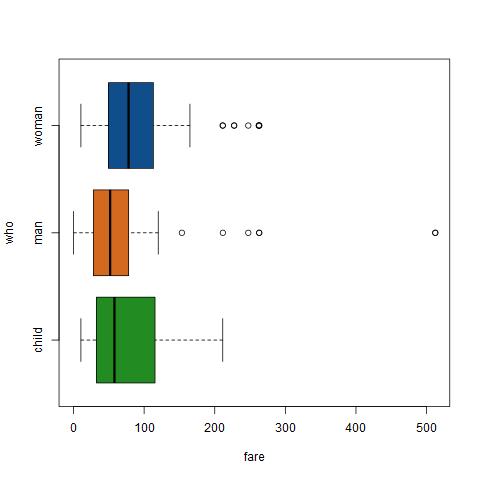

In [161]:
%%R
# Source: https://www.datamentor.io/r-programming/box-plot/
# Colors: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf
boxplot(ti$Fare[ti$Who=="child"],  ti$Fare[ti$Who=="man"], ti$Fare[ti$Who=="woman"], horizontal=TRUE,
    xlab = "fare", ylab = "who",
    names = c("child", "man", "woman"),
    col = c("forestgreen", "chocolate", "dodgerblue4")
)

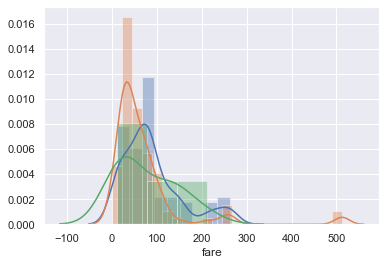

In [124]:
sns.distplot(ti.loc[ti['who'] == 'woman', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'man', 'fare'])
sns.distplot(ti.loc[ti['who'] == 'child', 'fare']);

In [104]:
ti['who']

0      woman
1      woman
2        man
       ...  
179    woman
180    woman
181      man
Name: who, Length: 182, dtype: object

## Qualitative Daten

## Anpassung von Plots

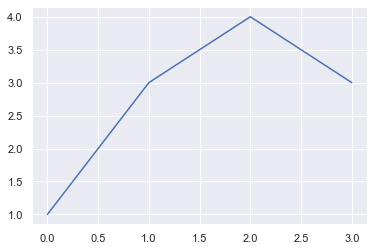

In [105]:
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

# Create a figure
f = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

In [106]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [107]:
# HIDDEN
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [108]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set()

# Load the dataset
ti = sns.load_dataset('titanic').reset_index(drop=True)

# This table is too large to fit onto a page so we'll output sliders to
# pan through different sections.
df_interact(ti)

interactive(children=(IntSlider(value=0, description='row', max=891, step=5), IntSlider(value=0, description='…

(891 rows, 15 columns) total


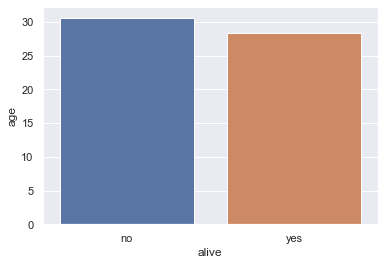

In [109]:
sns.barplot(x='alive', y='age', data=ti, ci=False);

## Prinzipien der Visualisierung

## Prinzipien der Visualisierung II

## Visualisierungs Philosophie